In [1]:
import pandas as pd

# Load the processed data
data = pd.read_csv("../data/processed/diabetes_scaled.csv")

# Split features and target
X = data.drop("target", axis=1)  # Features
y = data["target"]  # Target


In [2]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 353 samples
Test set size: 89 samples


In [3]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 42.79
Mean Squared Error (MSE): 2900.19
R² Score: 0.45


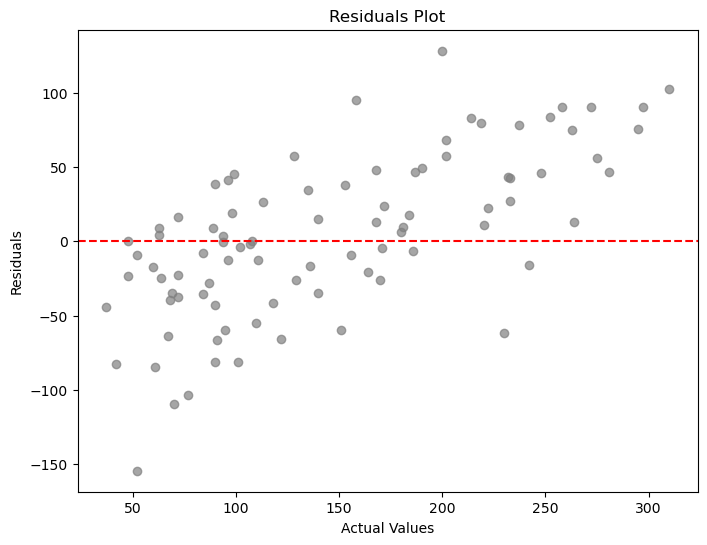

In [5]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color="gray")
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


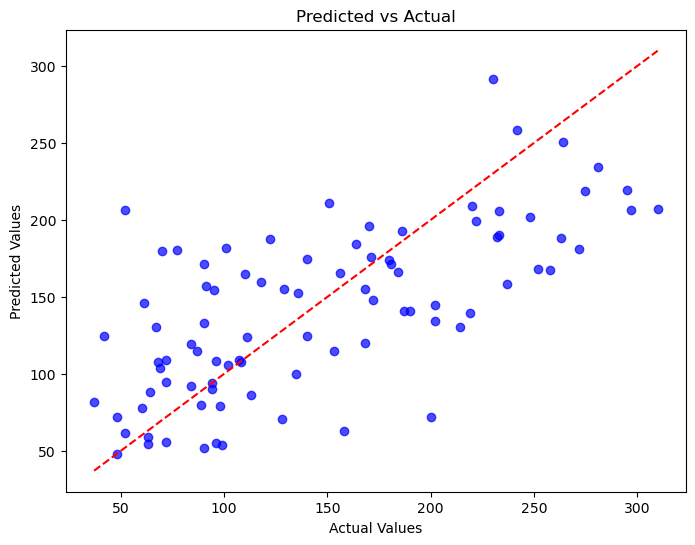

In [6]:
# Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()


Feature Coefficients:
 s5     35.017409
bmi    25.800705
s2     24.641710
bp     16.538585
s4     13.095537
s3      7.773096
s6      2.315027
age     1.802910
sex   -11.509071
s1    -44.306406
dtype: float64


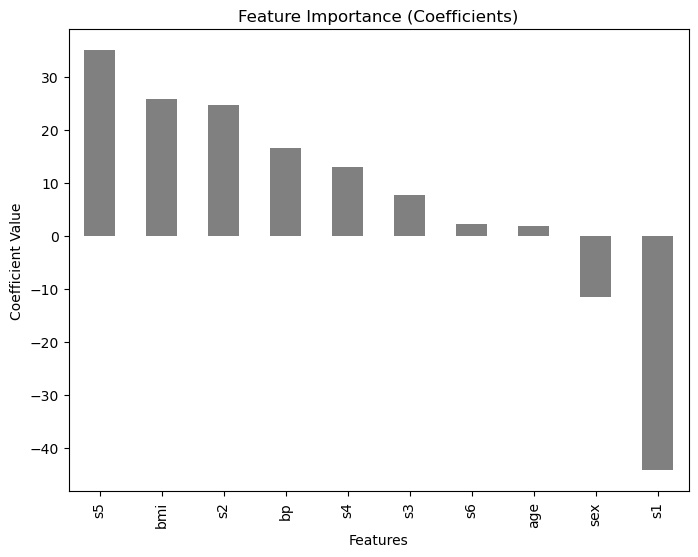

In [7]:
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Feature Coefficients:\n", coefficients)

# Bar plot of coefficients
plt.figure(figsize=(8, 6))
coefficients.plot(kind="bar", color="gray")
plt.title("Feature Importance (Coefficients)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.show()
